# K-Means Clustering

K means clustering is a clustering algorithm that groups data points into k clusters based on their similarity, which is defined by the distance between the data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["species"].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
test_data = df.copy()
test_data.drop(['species'], axis=1, inplace=True)

In [5]:
test_data['sepal_length'] = test_data['sepal_length'].astype(float)
test_data['sepal_width'] = test_data['sepal_width'].astype(float)
test_data['petal_length'] = test_data['petal_length'].astype(float)
test_data['petal_width'] = test_data['petal_width'].astype(float)

test_data['petal_length'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: petal_length, dtype: int64

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def get_clusters(data, k):
    centroids = data.sample(n=k)
    clusters = [[] for _ in centroids.index]
    if type(data) is pd.DataFrame:
        while True:
            old_centroids = centroids.copy()
            for i in data.index:
                distances = []
                for j in centroids.index:
                    distances.append(euclidean_distance(data.loc[i], centroids.loc[j]))
                clusters[distances.index(np.min(distances))].append([x for x in data.loc[i]])
            if old_centroids.equals(centroids):
                break
            for i in range(k):
                centroids[i] = np.mean(clusters[i], axis=0)
    else:
        while True:
            old_centroids = centroids.copy()
            for i in data.index:
                distances = []
                for j in centroids.index:
                    distances.append(euclidean_distance(data[i], centroids[j]))
                clusters[distances.index(np.min(distances))].append(data[i])
            if old_centroids.equals(centroids):
                break
            for i in range(k):
                centroids[i] = np.mean(clusters[i], axis=0)
                
    return centroids, clusters

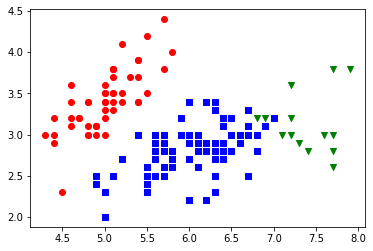

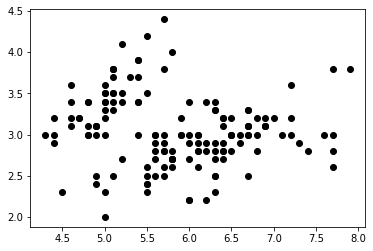

In [9]:
centeriods, clusters = get_clusters(test_data['sepal_length'], 3)
multliCenteriods, multliClusters = get_clusters(test_data, 3)

colors = ['red', 'green', 'blue']
markers = ['o', 'v', 's']

# convert to dataframe
df_clusters = []
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(len(multliClusters)):
    df_clusters.append(pd.DataFrame(columns=columns, data=multliClusters[i]))

# plot clusters
for i in range(len(multliClusters)):
    plt.scatter(df_clusters[i]['sepal_length'], df_clusters[i]['sepal_width'], c=colors[i], marker=markers[i])

plt.show()
# plot original data
plt.scatter(test_data['sepal_length'], test_data['sepal_width'], c='black', marker='o')

In [ ]:
# or

In [ ]:
# Plot the clusters using seaborn
sns.set(style="whitegrid")
for i in range(len(clusters)):
    sns.pairplot(df_clusters[i], palette=colors, markers=markers)
plt.show()